## 回家作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可降低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)


請用Python 回答以下問題

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請使用Pandas 統計男女別的平均 Credit.Amount
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?

In [2]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [3]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [4]:
## SELECT Sex...Marital.Status, AVG(Credit.Amount	) FROM df GROUP BY Sex...Marital.Status;
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean()

Sex...Marital.Status
1    2896.327684
2    3694.981685
3    1993.360000
Name: Credit.Amount, dtype: float64

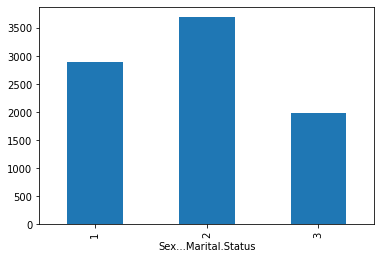

In [5]:
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean().plot(kind = 'bar')

In [6]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [8]:
y = df.iloc[:,0]
y.head()

497    1
756    0
580    0
833    0
602    1
Name: Creditability, dtype: int64

In [9]:
X = df.iloc[:,1:]
X.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_y = clf.predict(X)

In [12]:
(y == pred_y ).sum() / len(y)

0.798

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred_y)

0.798

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
clf1 = RandomForestClassifier()
clf1.fit(X,y)

clf2 = GradientBoostingClassifier()
clf2.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
pred_y1 = clf1.predict(X)
pred_y2 = clf2.predict(X)

In [16]:
accuracy_score(y, pred_y1)

1.0

In [17]:
accuracy_score(y, pred_y2)

0.93

In [18]:
len(X.columns)

20

## 主成分分析

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()

NameError: ignored

In [21]:
pca.components_

array([[-2.01956244e-05,  2.50391428e-03,  1.47920110e-06,
        -3.24785057e-05,  9.99996827e-01,  1.59499249e-05,
        -1.23836860e-05, -1.10911984e-04, -3.06591799e-07,
        -8.00839718e-07,  2.23847060e-07,  1.22174890e-04,
         2.07536079e-04, -1.02078733e-05,  2.99376044e-05,
        -6.92305176e-06,  0.00000000e+00,  2.60308900e-06,
         4.91638374e-05,  2.19567447e-06],
       [ 3.53109045e-03, -3.60650139e-01,  8.83228175e-03,
         2.08452770e-03,  7.08734090e-04,  5.64788028e-03,
         2.33625552e-02, -3.19690353e-03, -4.60170388e-04,
        -1.86162595e-03,  2.25534209e-02,  1.35546189e-03,
         9.31926664e-01, -1.25463196e-03,  1.26317664e-02,
         4.85036445e-03,  0.00000000e+00,  4.21784989e-03,
         6.61197481e-03,  7.58475874e-04]])

In [22]:
X_reduced = pca.transform(X)
X_reduced.shape

(500, 2)

In [23]:
X_reduced[0:3]

array([[-1.13413283e+03, -1.24062275e+00],
       [-2.29210577e+03, -1.54152988e+00],
       [ 3.93194164e+03, -9.65273810e+00]])

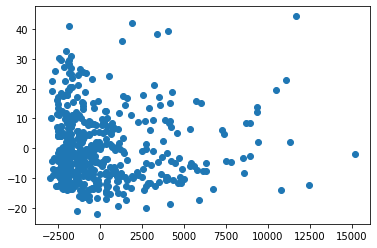

In [24]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced[:,0],X_reduced[:,1])

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_reduced,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

In [32]:
import numpy as np
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

In [33]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Component 2')

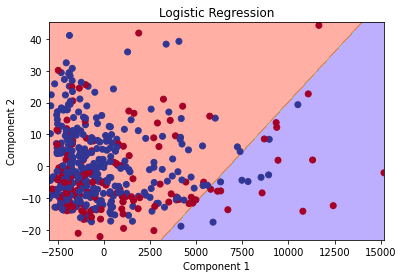

In [34]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_reduced,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
import numpy as np
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Gradient Boosting Classfier')
plt.xlabel('Component 1')
plt.ylabel('Component 2')